# Predição de Acidente Vascular Cerebral (AVC) com RNA MLP

A base de dados utilizada neste projeto foi obtida no Kaggle, e pode ser encontrada [aqui](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset).

### Importando as bibliotecas necessárias

In [51]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import pickle
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import datetime

### Carregando os dados

In [52]:
dataset = pd.read_csv('data/healthcare-dataset-stroke-data.csv')
dataset.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [53]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [54]:
"""
    Dados de entrada:
    gender:            sexo do paciente (masculino, feminino, outro)
    Age:               idade do paciente (em anos)
    hypertension:      se o paciente tem hipertensão (0, 1)
    heart_disease:     se o paciente tem doença cardíaca (0, 1)
    ever_married:      se o paciente já se casou (sim, não)
    work_type:         tipo de trabalho do paciente (nunca trabalhou, privado, autonomo, governo, criança)
    Residence_type:    tipo de residência do paciente (urbana, rural)
    avg_glucose_level: nível médio de glicose no sangue do paciente (em mg/dL)
    bmi:               índice de massa corporal do paciente (em kg/m^2)
    smoking_status:    status de fumante do paciente (nunca fumou, ex-fumante, fumante atual ou desconhecido)
    stroke:            se o paciente teve um AVC (0, 1)    
"""

'\n    Dados de entrada:\n    gender:            sexo do paciente (masculino, feminino, outro)\n    Age:               idade do paciente (em anos)\n    hypertension:      se o paciente tem hipertensão (0, 1)\n    heart_disease:     se o paciente tem doença cardíaca (0, 1)\n    ever_married:      se o paciente já se casou (sim, não)\n    work_type:         tipo de trabalho do paciente (nunca trabalhou, privado, autonomo, governo, criança)\n    Residence_type:    tipo de residência do paciente (urbana, rural)\n    avg_glucose_level: nível médio de glicose no sangue do paciente (em mg/dL)\n    bmi:               índice de massa corporal do paciente (em kg/m^2)\n    smoking_status:    status de fumante do paciente (nunca fumou, ex-fumante, fumante atual ou desconhecido)\n    stroke:            se o paciente teve um AVC (0, 1)    \n'

In [55]:
# drop coluna id
dataset.drop(['id'], axis=1, inplace=True)

### Análise Exploratória de Dados (EDA)

In [56]:
import matplotlib.pyplot as plt

#### Colunas categóricas e numéricas

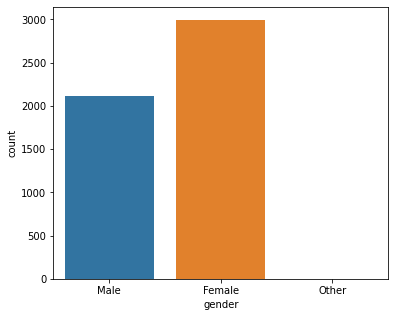

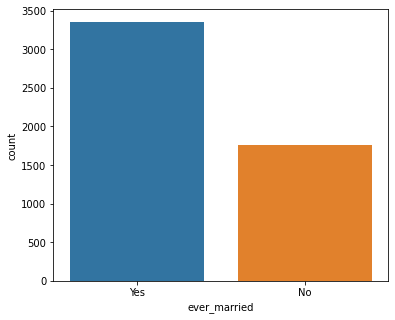

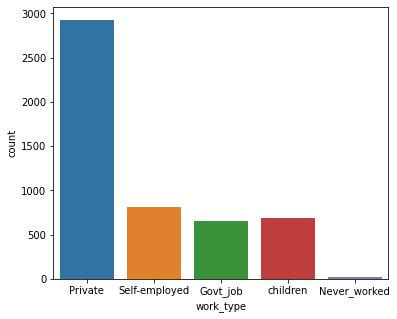

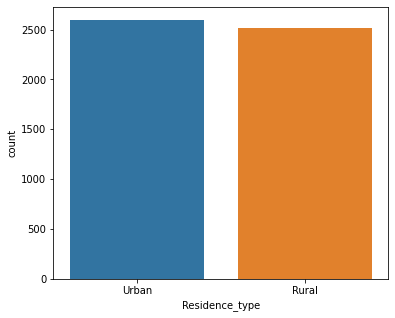

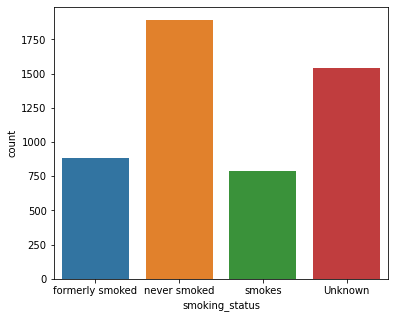

In [57]:
colCategoricas = dataset[['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']]

for col in colCategoricas:
    plt.figure(figsize=(6,5))
    sns.countplot(x=col, data=dataset)
    plt.show()


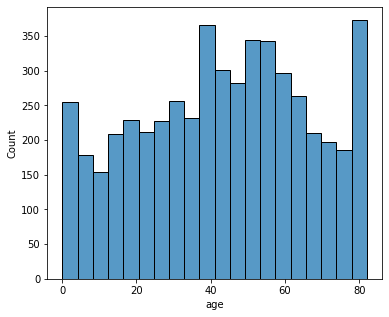

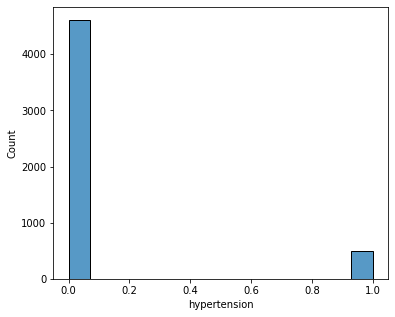

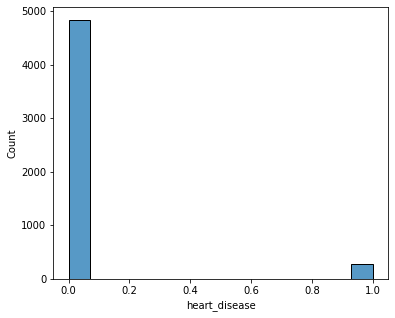

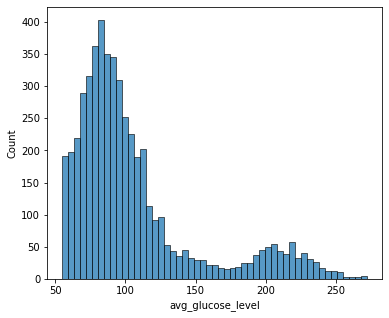

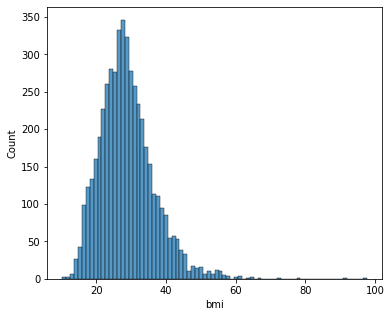

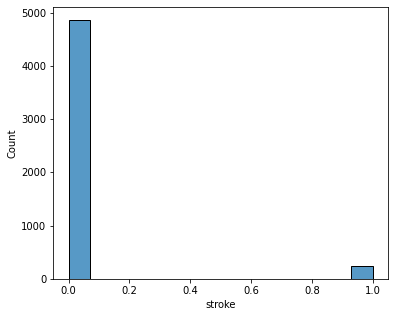

In [58]:
colNumericas = dataset[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']]

for col in colNumericas:
    plt.figure(figsize=(6,5))
    sns.histplot(x=col, data=dataset)
    plt.show()

### Pré-processamento dos dados

In [59]:
# Mapeamento de dados categóricos
def mapping(data, coluna):
    colunaMap = dict()
    count = 0.0
    for i in sorted(data[coluna].unique(), reverse=True):
        colunaMap[i]=count
        count = count+1.0
    data[coluna] = data[coluna].map(colunaMap)
    return data

# Normalização de dados numéricos
def normalizarCol(data, coluna, rangeN=[0,1]):
    data[coluna] = (((data[coluna] - data[coluna].min()) / (data[coluna].max() - data[coluna].min())) * (rangeN[1] - rangeN[0])) -rangeN[0]
    return data.convert_dtypes(infer_objects=False, convert_integer=False, convert_floating= True)


In [60]:
print(dataset.gender.unique())

dataset = mapping(dataset, "gender") #quantifica a coluna
dataset = normalizarCol(dataset, "gender", [0, 1]) #normaliza a coluna

print(dataset.gender.unique())

['Male' 'Female' 'Other']
<FloatingArray>
[0.5, 1.0, 0.0]
Length: 3, dtype: Float64


In [61]:
dataset.age.info()
dataset = normalizarCol(dataset, "age", [0, 1])

<class 'pandas.core.series.Series'>
RangeIndex: 5110 entries, 0 to 5109
Series name: age
Non-Null Count  Dtype  
--------------  -----  
5110 non-null   Float64
dtypes: Float64(1)
memory usage: 45.0 KB


In [62]:
print(dataset.ever_married.unique())

dataset = mapping(dataset, "ever_married")
dataset = normalizarCol(dataset, "ever_married", [0, 1])

print(dataset.ever_married.unique())

<StringArray>
['Yes', 'No']
Length: 2, dtype: string
<FloatingArray>
[0.0, 1.0]
Length: 2, dtype: Float64


In [63]:
print(dataset.work_type.unique())

dataset = mapping(dataset, "work_type")
dataset = normalizarCol(dataset, "work_type", [0, 1])

print(dataset.work_type.unique())

<StringArray>
['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked']
Length: 5, dtype: string
<FloatingArray>
[0.5, 0.25, 1.0, 0.0, 0.75]
Length: 5, dtype: Float64


In [64]:
print(dataset.Residence_type.unique())

dataset = mapping(dataset, "Residence_type")
dataset = normalizarCol(dataset, "Residence_type", [0, 1])

print(dataset.Residence_type.unique())

<StringArray>
['Urban', 'Rural']
Length: 2, dtype: string
<FloatingArray>
[0.0, 1.0]
Length: 2, dtype: Float64


In [65]:
dataset.avg_glucose_level.info()
dataset = normalizarCol(dataset, "avg_glucose_level", [0, 1])

<class 'pandas.core.series.Series'>
RangeIndex: 5110 entries, 0 to 5109
Series name: avg_glucose_level
Non-Null Count  Dtype  
--------------  -----  
5110 non-null   Float64
dtypes: Float64(1)
memory usage: 45.0 KB


In [66]:
dataset.bmi.info()
dataset = dataset.fillna(dataset['bmi'].mean())
dataset = mapping(dataset, "bmi")
dataset = normalizarCol(dataset, "bmi", [0, 1])

<class 'pandas.core.series.Series'>
RangeIndex: 5110 entries, 0 to 5109
Series name: bmi
Non-Null Count  Dtype  
--------------  -----  
4909 non-null   Float64
dtypes: Float64(1)
memory usage: 45.0 KB


In [67]:
print(dataset.smoking_status.unique())

dataset = mapping(dataset, "smoking_status")
dataset = normalizarCol(dataset, "smoking_status", [0, 1])

print(dataset.smoking_status.unique())

<StringArray>
['formerly smoked', 'never smoked', 'smokes', 'Unknown']
Length: 4, dtype: string
<FloatingArray>
[0.6666666666666666, 0.3333333333333333, 0.0, 1.0]
Length: 4, dtype: Float64


In [68]:
dataset.stroke.info()
dataset = normalizarCol(dataset, "stroke", [0, 1])

<class 'pandas.core.series.Series'>
RangeIndex: 5110 entries, 0 to 5109
Series name: stroke
Non-Null Count  Dtype
--------------  -----
5110 non-null   int64
dtypes: int64(1)
memory usage: 40.0 KB


### Divisão dos dados em treino e teste

In [69]:
X, y = dataset.values[:, :-1], dataset.values[:, -1]
X= X.astype('float32')
y = LabelEncoder().fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
n_features = X_train.shape[1] #feature selection

(4088, 10) (1022, 10) (4088,) (1022,)


### Construção do modelo de predição

In [70]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(n_features, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(tf.keras.layers.Dense(6, activation='relu', kernel_initializer='he_normal'))
model.add(tf.keras.layers.Dense(14, activation='relu', kernel_initializer='he_normal'))
model.add(tf.keras.layers.Dense(24, activation='relu', kernel_initializer='he_normal'))
model.add(tf.keras.layers.Dense(6, activation='relu', kernel_initializer='he_normal'))
model.add(tf.keras.layers.Dense(2, activation='softmax'))


In [71]:

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=64, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/64
64/64 [==============================] - 1s 7ms/step - loss: 0.2477 - accuracy: 0.9503 - val_loss: 0.1889 - val_accuracy: 0.9550
Epoch 2/64
64/64 [==============================] - 0s 2ms/step - loss: 0.1880 - accuracy: 0.9503 - val_loss: 0.1811 - val_accuracy: 0.9550
Epoch 3/64
64/64 [==============================] - 0s 2ms/step - loss: 0.1822 - accuracy: 0.9503 - val_loss: 0.1778 - val_accuracy: 0.9550
Epoch 4/64
64/64 [==============================] - 0s 3ms/step - loss: 0.1797 - accuracy: 0.9503 - val_loss: 0.1759 - val_accuracy: 0.9550
Epoch 5/64
64/64 [==============================] - 0s 3ms/step - loss: 0.1769 - accuracy: 0.9503 - val_loss: 0.1747 - val_accuracy: 0.9550
Epoch 6/64
64/64 [==============================] - 0s 2ms/step - loss: 0.1749 - accuracy: 0.9503 - val_loss: 0.1737 - val_accuracy: 0.9550
Epoch 7/64
64/64 [==============================] - 0s 2ms/step - loss: 0.1732 - accuracy: 0.9503 - val_loss: 0.1735 - val_accuracy: 0.9550
Epoch 8/64
64/64 [==

In [72]:
loss, acc = model.evaluate(X_test, y_test)

32/32 [==============================] - 0s 1ms/step - loss: 0.1822 - accuracy: 0.9550


In [73]:
print('Perda: %.3f, \nAcuracia: %.3f' % (loss, acc))

Perda: 0.182, 
Acuracia: 0.955


32/32 [==============================] - 0s 807us/step


<AxesSubplot:>

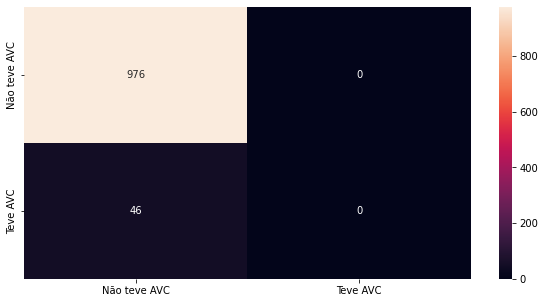

In [74]:
from sklearn.metrics import confusion_matrix

predictions = model.predict(X_test)

plt.figure(figsize=(10,5))
cm = confusion_matrix(y_test, predictions.argmax(axis=1))
confusion_matrix = pd.DataFrame(cm, index = ['Não teve AVC', 'Teve AVC'], columns = ['Não teve AVC', 'Teve AVC'])
sns.heatmap(confusion_matrix, annot=True, fmt='g')

A = Positivo verdadeiro
B = Positivo falso
C = Negativo falso
D = Negativo verdadeiro
